In [ ]:
# 
# 
# 

In [165]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [3]:
city_data = "Resources/city_data.csv"

# Import the city_data.csv file as a DataFrame
citydata_df = pd.read_csv(city_data, encoding="utf-8")
citydata_df.head()
#citydata_df['type']

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
ride_data = "Resources/ride_data.csv"
# Import the ridedata_df file as a DataFrame
ridedata_df = pd.read_csv(ride_data,encoding="utf-8" )
ridedata_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [10]:
merge_data = pd.merge(citydata_df, ridedata_df, on="city", how="outer")
merge_data.head(30)

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829
5,Kelseyland,63,Urban,2016-10-24 15:15:46,33.56,4797969661996
6,Kelseyland,63,Urban,2016-06-06 13:54:23,20.81,9811478565448
7,Kelseyland,63,Urban,2016-08-10 07:02:40,44.53,1563171128434
8,Kelseyland,63,Urban,2016-07-05 17:37:13,29.02,6897992353955
9,Kelseyland,63,Urban,2016-04-25 02:18:31,20.05,1148374505062


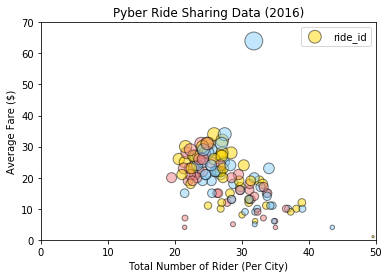

In [164]:
#Build a Bubble Plot that showcases the relationship between four key variables:
#Average Fare ($) Per City
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)
#cityplotdata = []

cityplotdata =  merge_data.groupby(['type','city']).agg({'fare':"mean", 'ride_id': "count", 'driver_count': "count"}) 
x_axis=cityplotdata["fare"]
y_axis=cityplotdata["ride_id"]

plt.scatter(x=cityplotdata["fare"],y=cityplotdata["ride_id"], c=colors, s=cityplotdata["driver_count"]*5, edgecolors="black", linewidths=1, marker="o",alpha=0.5,)

# Incorporate the other graph properties
colors= ("Gold", "LightSkyBlue", "LightCoral")
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rider (Per City)")
plt.ylim(0,70,5)
plt.xlim(0,50,5)

plt.legend(loc="best")
#plt.legend(handles=[cityplotdata["fare"], cityplotdata["ride_id"]], loc="best")
plt.show()

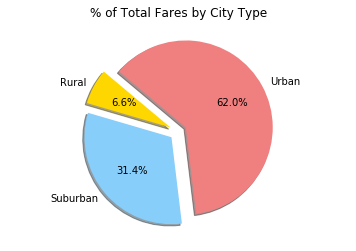

In [162]:
#% of Total Fares by City Type

cityfaredata =  merge_data.groupby(['type']).agg({'fare':"sum"}) 

colors = ["gold", "lightskyblue", "lightcoral",] 
explode = (0.1, 0.1, 0.1)
labels = ['Rural','Suburban', 'Urban']
plt.axis("equal")
#labels = cityfaredata['type']

plt.pie(cityfaredata['fare'],  explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Fares by City Type')
plt.show()

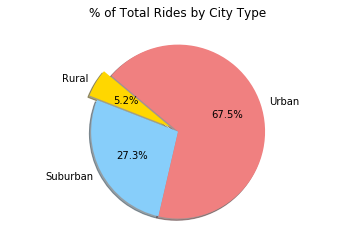

In [163]:
#% of Total Rides by City Type

cityridedata =  merge_data.groupby(['type']).agg({'ride_id':"count"}) 

colors = ["gold", "lightskyblue", "lightcoral",] 
explode = (0.1, 0, 0)
labels = ['Rural','Suburban', 'Urban']
plt.axis("equal")
#labels = cityfaredata['type']

plt.pie(cityridedata['ride_id'],  explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Rides by City Type')
plt.show()


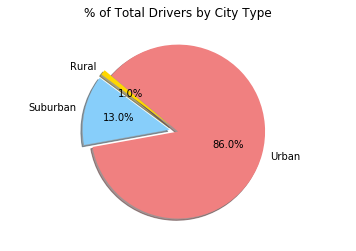

In [160]:
#% of Total Drivers by City Type

citydriverdata =  merge_data.groupby(['type']).agg({'driver_count':"sum"}) 

colors = ["gold", "lightskyblue", "lightcoral",] 
explode = (0.1, 0.1, 0)
labels = ['Rural','Suburban', 'Urban']
plt.axis("equal")
#labels = cityfaredata['type']
#cityridedata.head()

plt.pie(citydriverdata['driver_count'],  explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Drivers by City Type')
plt.show()